In [ ]:
# ================================
# FULL FAKE NEWS DETECTOR (ML-BASED)
# ================================

# Step 0: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [7]:

# Step 1: Load datasets
true_data = pd.read_csv('True.csv', on_bad_lines='skip')
false_data = pd.read_csv('Fake.csv', on_bad_lines='skip')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Step 2: Show first and last 5 rows
print("===== TRUE DATA (head) =====")
print(true_data.head())
print("\n===== TRUE DATA (tail) =====")
print(true_data.tail())

print("\n===== FALSE DATA (head) =====")
print(false_data.head())
print("\n===== FALSE DATA (tail) =====")
print(false_data.tail())


===== TRUE DATA (head) =====
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

===== TRUE DATA (tail) =====
                                       

In [10]:
# Step 3: Add labels (1 = True news, 0 = Fake news)
true_data['label'] = 1
false_data['label'] = 0# Step 3: Add labels (1 = True news, 0 = Fake news)
true_data['label'] = 1
false_data['label'] = 0

In [11]:
# Step 4: Combine datasets
data = pd.concat([true_data, false_data], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

print("\n===== Combined Data Info =====")
print(data.info())



===== Combined Data Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [12]:
# Step 5: Define features and labels
X = data['text']
y = data['label']

In [13]:
# Step 6: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# Step 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [15]:
# Step 8: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [16]:
# Step 9: Make Predictions
y_pred = model.predict(X_test_vec)

In [17]:
# Step 10: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"\n===== Model Evaluation =====")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

print("\n===== Detailed Classification Report =====")
print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))


===== Model Evaluation =====
Accuracy : 0.9845
Precision: 0.9807

===== Detailed Classification Report =====
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      5877
        True       0.98      0.99      0.98      5348

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



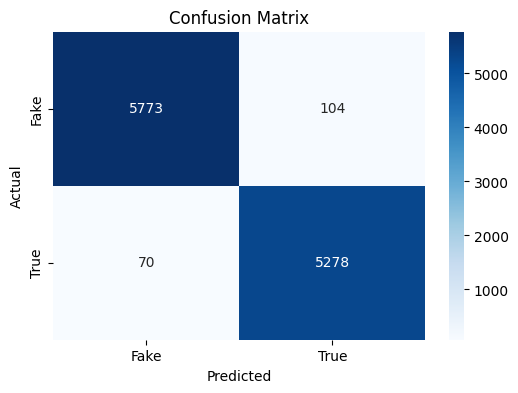

In [18]:
# Step 11: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Step 12: Function to Predict New News Text
def predict_news(news_text):
    news_vec = vectorizer.transform([news_text])
    prediction = model.predict(news_vec)
    return 'True' if prediction[0] == 1 else 'Fake'

# Example Usage
example_news = "India's Prime Minister is Narendra Modi"
result = predict_news(example_news)
print(f"\nExample News Prediction: {result}")



Example News Prediction: True
